In [2]:
import tensorflow as tf
from utils import *
from deep_shadow import *
import os
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
tf.keras.backend.clear_session()
down_stack, up_stack = get_generator_arch('resnet9', attn=False)
deep_shadow = DeepShadow(512, 512, down_stack, up_stack, latitude=True, date=True, loss_funcs=[ssim_loss, sobel_loss, l1_loss], type='resnet9', attention=False)
deep_shadow.restore('training_checkpoints_new/uniform_cities_resnet_wo_attn__ssim_sobel_plus_l1')

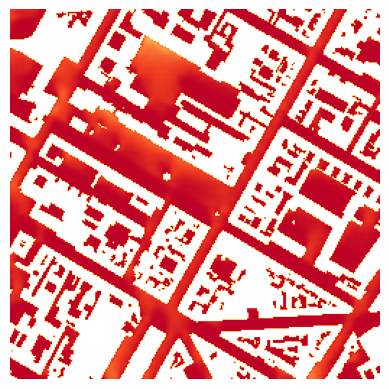

In [4]:
colors = [(1, 1, 1), (254/255,204/255,92/255), (253/255,141/255,60/255), (240/255,59/255,32/255), (189/255,0,38/255)]
_cmap = LinearSegmentedColormap.from_list('colorscale', colors, N=100)

shadow_path = 'data/shadows/'
height_path = 'data/heights_new/'

city, date, zoom = 'par', 'winter', 16
I, J = 33185, 22549

input_height, prediction = predict_shadow(deep_shadow.generator,
    height_path, city, date, zoom, I, J, lat=True, dat=True)

gt = load_ground_truth(input_height, shadow_path,
                        city, date, zoom, I, J)

# prediction = tf.reshape(prediction, (256, 256, 1))
prediction = tf.cast(prediction, tf.float32)
prediction = tf.expand_dims(prediction, 0)
prediction = tf.expand_dims(prediction, -1)

# gt = tf.reshape(gt, (256, 256, 1))
gt = tf.cast(gt, tf.float32)
gt = tf.expand_dims(gt, 0)
gt = tf.expand_dims(gt, -1)

#  input_height, gt[0, :, :, :], prediction[0, :, :, :]

# plt.subplot(3, 3, k+1)
plt.imshow(prediction[0, :, :, 0], cmap=_cmap)
plt.axis('off');

In [14]:
def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = matplotlib.colormaps.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    # cmap = matplotlib.colormaps.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    # fig, ax = plt.subplots(2, figsize=(6, 2),
    #                        subplot_kw=dict(xticks=[], yticks=[]))
    plt.imshow([colors], extent=[0, 40, 0, 4])
    plt.axis('off')
    # ax[1].imshow([grayscale], extent=[0, 10, 0, 1])


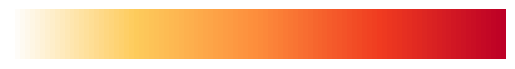

In [15]:
view_colormap(_cmap)